<a href="https://colab.research.google.com/github/Mansoldo/DataScience_Python/blob/master/dataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#!pip install seaborn == 0.9.0
#import seaborn as sns
print(sns.__version__)

0.10.1


# Analisando as notas em geral


In [59]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [60]:
notas.shape

(100836, 4)

In [61]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [62]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [63]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [64]:
print("Media", notas['nota'].mean())
print("Mediana", notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


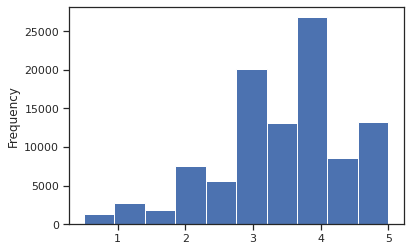

In [65]:
notas.nota.plot(kind='hist')

In [66]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

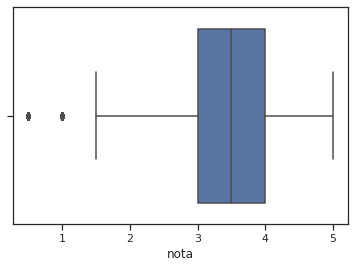

In [67]:
import seaborn as sns

sns.boxplot(notas.nota)

#Olhando os filmes


In [68]:
filmes = pd.read_csv("movies.csv")

In [69]:
filmes.columns = ["filmeID", "titulo", "generos"]
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando algumas notas específicas por filme


In [71]:
notas.query("filmeID == 1").nota.mean()

3.9209302325581397

In [72]:
notas.query("filmeID == 2").nota.mean()

3.4318181818181817

In [73]:
medias_por_filmes = notas.groupby("filmeID").mean()["nota"]
medias_por_filmes.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

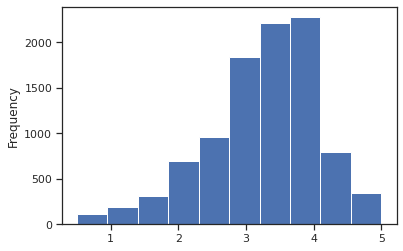

In [74]:
medias_por_filmes.plot(kind = 'hist')

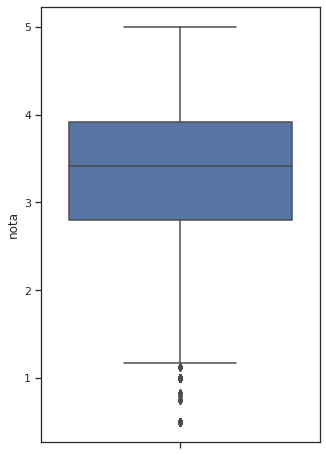

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y = medias_por_filmes)


In [76]:
medias_por_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

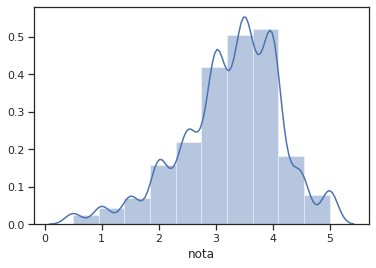

In [77]:
sns.distplot(medias_por_filmes, bins = 10)

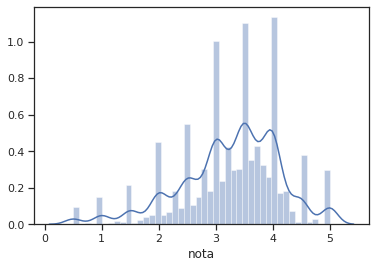

In [78]:
sns.distplot(medias_por_filmes)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

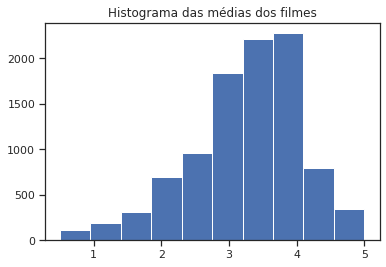

In [79]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filmes)
plt.title("Histograma das médias dos filmes")

In [80]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [81]:
tmdb.original_language.unique() # categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [82]:
#budget -> orçamento -> quantitativa continuo 
tmdb["original_language"].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
id       2
ar       2
cs       2
ta       2
ro       2
hu       1
ky       1
ps       1
te       1
el       1
xx       1
pl       1
af       1
sl       1
vi       1
tr       1
no       1
nb       1
is       1
Name: original_language, dtype: int64

In [83]:
tmdb["original_language"].value_counts().index
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [84]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


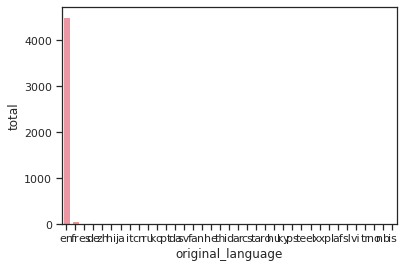

In [85]:
sns.barplot(x= "original_language", y = "total", data = contagem_de_lingua)

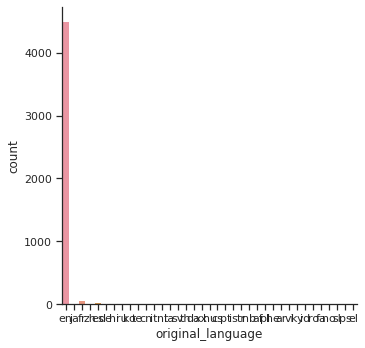

In [86]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f583e00e710>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

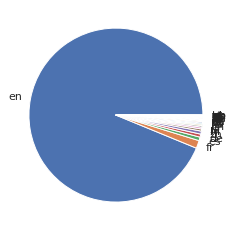

In [87]:
#Pie isn't a natural graph to use
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [88]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_de_resto = total_geral - total_de_ingles
print(total_de_ingles, total_de_resto)

4505 298


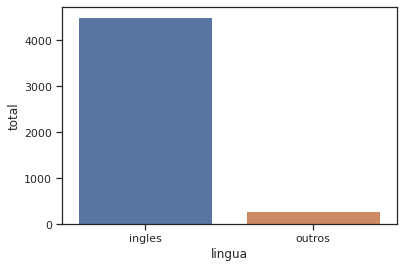

In [89]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_de_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x = "lingua", y = "total", data = dados)

([<matplotlib.patches.Wedge at 0x7f583dec20b8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

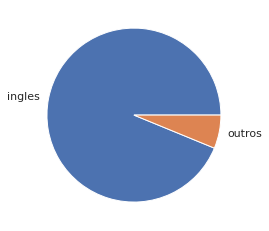

In [90]:
plt.pie(dados["total"], labels = dados["lingua"])

In [91]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
cs     2
ro     2
ta     2
ar     2
id     2
sl     1
el     1
ps     1
xx     1
no     1
ky     1
is     1
hu     1
te     1
tr     1
pl     1
vi     1
nb     1
af     1
Name: original_language, dtype: int64

## Sem tratamento


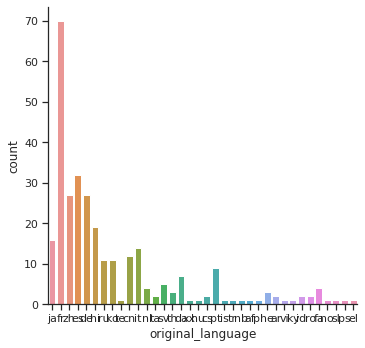

In [92]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
#plt.figure(figsize=(5,10))
sns.catplot(x = "original_language", kind = "count", data = filmes_sem_lingua_original_em_ingles)

## Com tratamento


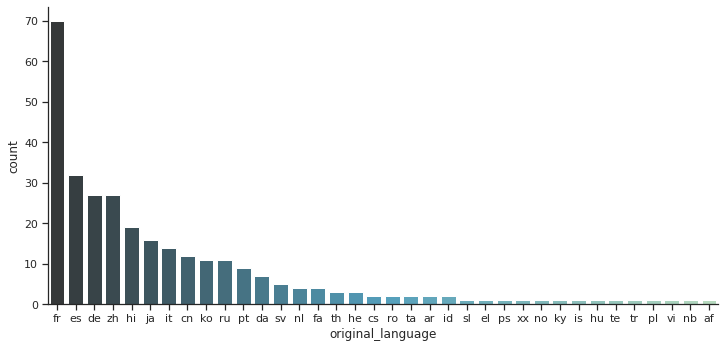

In [93]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
#plt.figure(figsize=(5,10))
sns.catplot(x = "original_language", kind = "count", data = filmes_sem_lingua_original_em_ingles,
            aspect = 2, 
            palette = "GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)

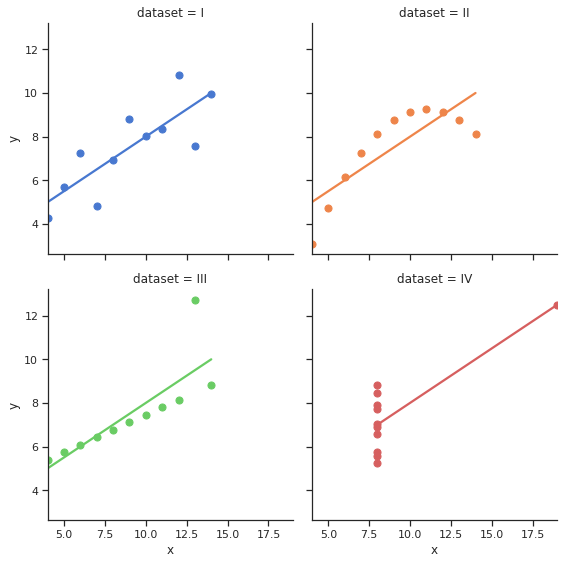

In [94]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [97]:
filmes.head(2)

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [98]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [99]:
notas_do_toy_story = notas.query("filmeID == 1")
notas_do_jumanji = notas.query("filmeID == 2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [101]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [102]:
print("Nota mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50


In [108]:
import numpy as np

filmes1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filmes2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [128]:
print(filmes1.mean(), filmes2.mean())
print(np.median(filmes1), np.median(filmes2))
print(np.std(filmes1), np.median(filmes2))

3.0 3.0
3.0 3.0
0.5 3.0


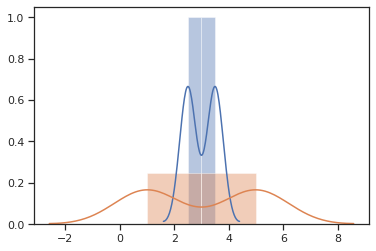

In [113]:
sns.distplot(filmes1)
sns.distplot(filmes2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

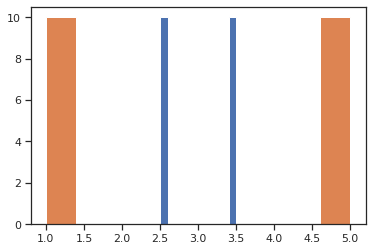

In [114]:
plt.hist(filmes1)
plt.hist(filmes2)

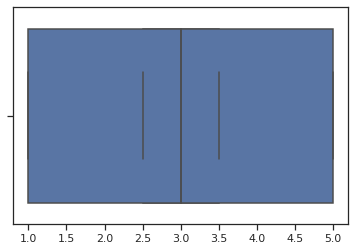

In [116]:
sns.boxplot(filmes1)
sns.boxplot(filmes2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f583d76bac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f583d7785c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f583d7800f0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f583d778cf8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f583d76be10>,
  <matplotlib.lines.Line2D at 0x7f583d780ac8>]}

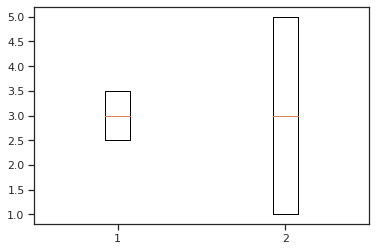

In [117]:
plt.boxplot([filmes1, filmes2])

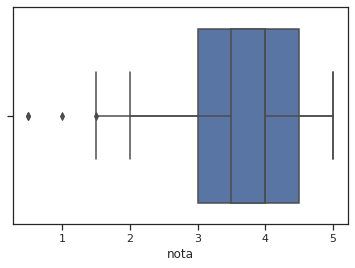

In [119]:
sns.boxplot(notas_do_toy_story.nota)
sns.boxplot(notas_do_jumanji.nota)

{'boxes': [<matplotlib.lines.Line2D at 0x7f583d74b128>,
 'caps': [<matplotlib.lines.Line2D at 0x7f583d6b9358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f583dfe1940>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f583d6b9ac8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f583d74b4e0>,
  <matplotlib.lines.Line2D at 0x7f583d6c29b0>]}

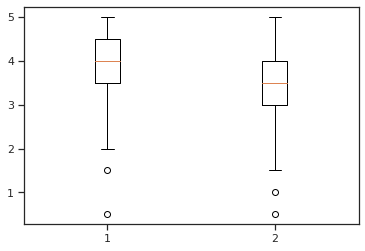

In [120]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

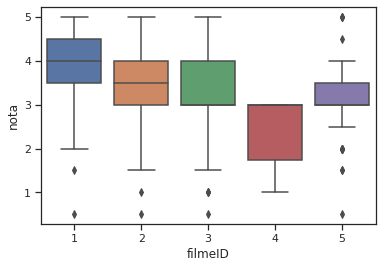

In [124]:
sns.boxplot(x = "filmeID", y = "nota", data = notas.query("filmeID in [1,2,3,4,5]"))

In [127]:
notas_do_jumanji.nota.std()
notas_do_toy_story.nota.std()
print(notas_do_jumanji.nota.std(), notas_do_toy_story.nota.std())

0.8817134921476455 0.8348591407114045
